In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'sklearn'

In [2]:
df=pd.read_csv("Universalbank_1500.csv")

In [3]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,45.268000,20.028000,74.252000,93074.272000,2.422667,1.983200,1.862667,55.820000,0.101333,0.106667,0.060667,0.605333,0.290667
std,433.157015,11.631726,11.641029,45.734235,2774.192336,1.166588,1.792592,0.837620,99.629023,0.301870,0.308792,0.238797,0.488942,0.454221
min,1.000000,23.000000,-2.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,375.750000,35.000000,10.000000,39.000000,91910.750000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,750.500000,45.000000,20.000000,64.000000,93117.000000,2.000000,1.600000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1125.250000,55.000000,30.000000,98.000000,94606.000000,4.000000,2.525000,3.000000,101.250000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1500.000000,67.000000,42.000000,205.000000,96651.000000,4.000000,10.000000,3.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
x=df.drop('Personal Loan', axis=1)
x

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,52,28,178,92647,3,5.4,3,147,0,0,1,0
1496,1497,36,12,18,91330,1,0.5,3,0,0,0,0,1
1497,1498,45,21,73,95020,1,0.8,3,0,0,0,1,0
1498,1499,49,23,125,94022,1,7.3,1,0,0,0,0,0


In [5]:
y=df.iloc[:,9]
y

0       0
1       0
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    0
1498    0
1499    1
Name: Personal Loan, Length: 1500, dtype: int64

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X


NameError: name 'StandardScaler' is not defined

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [18]:
svm_classifier = SVC(kernel='linear')  
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [19]:
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 92.22222222222223


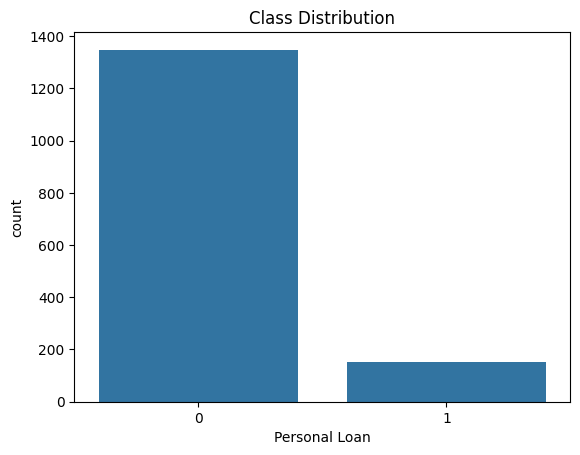

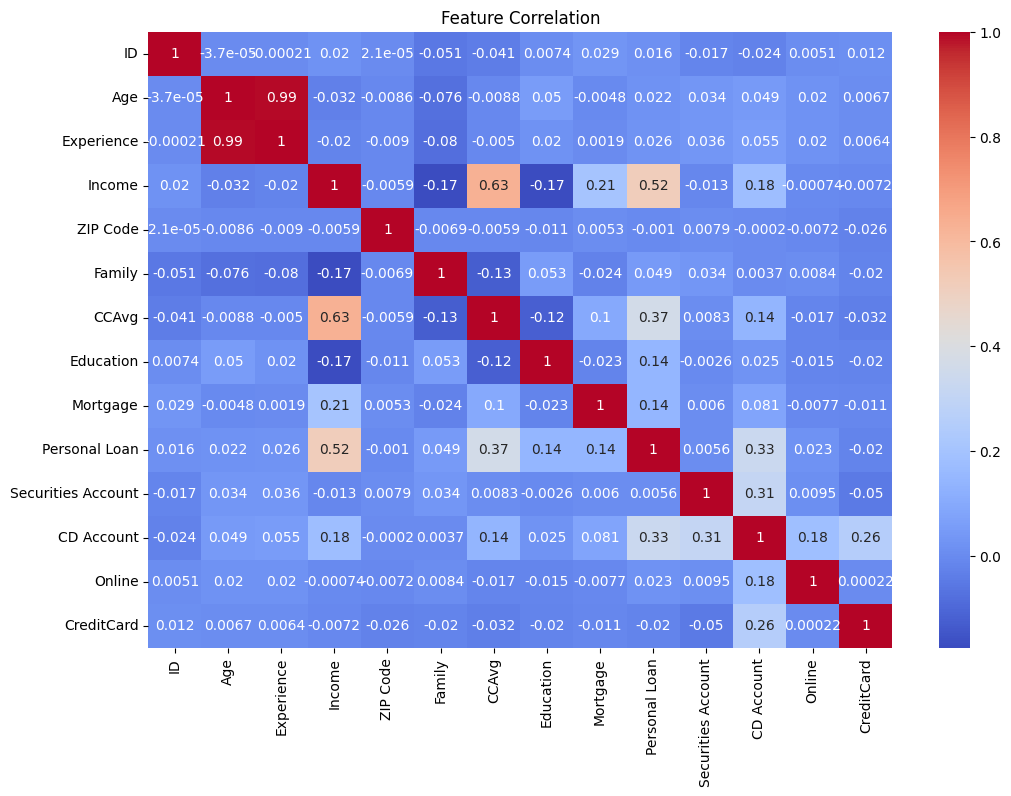

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(data=df, x='Personal Loan')
plt.title("Class Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [8]:

# For simplicity, let's use only 2 features for plotting
X = df[['Income', 'CCAvg']].values
y = df['Personal Loan'].values

# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Convert labels: 0 -> -1, 1 -> 1
y = np.where(y == 0, -1, 1)


In [9]:

class ManualSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)


In [10]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train
svm = ManualSVM()
svm.fit(X_train, y_train)

# Predict
predictions = svm.predict(X_test)

# Accuracy
accuracy = np.mean(predictions == y_test)
print(f"Manual SVM Accuracy: {accuracy:.2f}")


ModuleNotFoundError: No module named 'sklearn'

In [11]:

def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8,6))
    ax = plt.gca()
    xlim = ax.set_xlim(X[:,0].min()-1, X[:,0].max()+1)
    ylim = ax.set_ylim(X[:,1].min()-1, X[:,1].max()+1)

    # Create grid
    xx, yy = np.meshgrid(np.linspace(*ax.get_xlim(), num=200),
                         np.linspace(*ax.get_ylim(), num=200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, alpha=0.2, levels=[-1, 0, 1], cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Income (normalized)')
    plt.ylabel('CCAvg (normalized)')
    plt.title('Manual SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, svm)


NameError: name 'svm' is not defined